# Multidimensional derivatives

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

Now we consider a multidimensional function which means, the function depends on multiple variables 

\\( f(x,y,z)\\)

or it is a function that has multiple dimensions itself

\\( \vec{g}(x,y,z)=\begin{pmatrix}g_x(x,y,z)\\g_y(x,y,z)\\g_z(x,y,z)\end{pmatrix}\\)

With the nabla operator \\( \nabla = \begin{pmatrix}\frac{\partial}{\partial x}\\\frac{\partial}{\partial y}\\\frac{\partial}{\partial z}\end{pmatrix}\\) we can calculate:

- gradient \\( \nabla f(x,y,z) = \begin{pmatrix}\frac{\partial}{\partial x}f(x,y,z)\\\frac{\partial}{\partial y}f(x,y,z)\\\frac{\partial}{\partial z}f(x,y,z)\end{pmatrix}\\)

- curl \\(\nabla\times \vec{g}(x,y,z) = \begin{pmatrix}
\frac{\partial}{\partial y}g_z(x,y,z) - \frac{\partial}{\partial z}g_y(x,y,z)\\
\frac{\partial}{\partial z}g_x(x,y,z) - \frac{\partial}{\partial x}g_z(x,y,z)\\
\frac{\partial}{\partial x}g_y(x,y,z) - \frac{\partial}{\partial y}g_x(x,y,z)\\
\end{pmatrix}\\)

- divergence \\(\nabla\cdot \vec{g}(x,y,z) = \frac{\partial}{\partial x}g_x(x,y,z)+\frac{\partial}{\partial y}g_y(x,y,z)+\frac{\partial}{\partial z}g_z(x,y,z)\\)

### Example 

\\(
f(\vec{r})=f(x,y,z) = \exp(-x^2-y^4)
\\)

\\(
\vec{g}(\vec{r})=\frac{\vec{r}}{r}=\begin{pmatrix}x/\sqrt{x^2+y^2+z^2}\\y/\sqrt{x^2+y^2+z^2}\\z/\sqrt{x^2+y^2+z^2}\end{pmatrix}
\\)

In [15]:
def f(r):
    return np.exp(-r[0]**2 - r[1]**4)

def g(r):
    return r / np.linalg.norm(r)

In [16]:
x3, y3 = np.meshgrid(np.linspace(-2,2,201),np.linspace(-2,2,201))
z3 = f( np.array([ x3, y3 ]) )

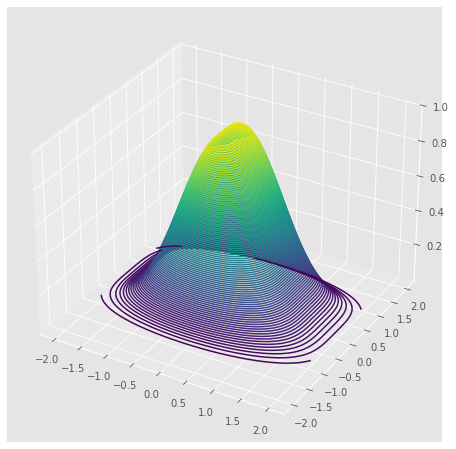

In [17]:
plt.figure(figsize=(15, 8));

plotproj = plt.axes(projection='3d')

plotproj.contour3D(x3,y3,z3,100);

In [18]:
# Change standard size of all figures in this notebook
plt.rcParams['figure.figsize'] = [15, 10]

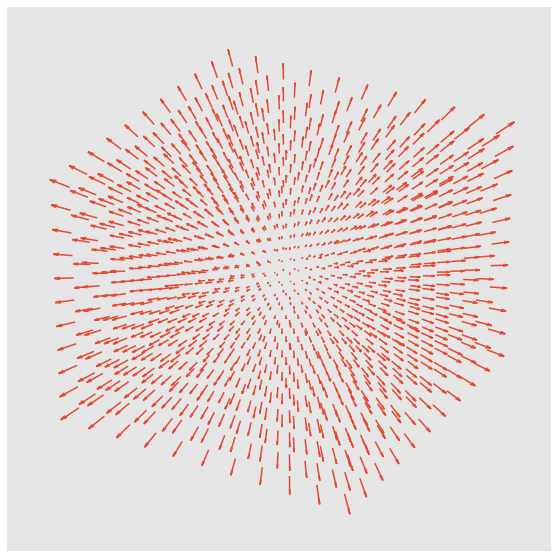

In [19]:
x3, y3, z3 = np.meshgrid(np.linspace(-2,2,11),np.linspace(-2,2,11),np.linspace(-2,2,11))
values = g( np.array([ x3, y3, z3 ]) )

arrowplot = plt.axes(projection='3d')
arrowplot.axis(False)

scale=7
arrowplot.quiver(
    x3, y3, z3,
    values[0]*scale,values[1]*scale,values[2]*scale
)

## Gradient

In [20]:
def gradient(f, r, h):
    x,y,z = r
    partialx = (f(np.array([x+h, y, z])) - f(np.array([x-h, y, z]))) / (2*h)
    partialy = (f(np.array([x, y+h, z])) - f(np.array([x, y-h, z]))) / (2*h)
    partialz = (f(np.array([x, y, z+h])) - f(np.array([x, y, z-h]))) / (2*h)
    return np.array([partialx, partialy, partialz])

In [21]:
r = np.array([0.5, -1.2,-8])
h = 0.0001
gradient(f, r, h)

array([-0.09792044,  0.67682606,  0.        ])

- analytical solution 

\\( \nabla f(x,y,z) = \begin{pmatrix}-2x\exp(-x^2-y^4)\\-4y^3\exp(-x^2-y^4)\\0\end{pmatrix} \\)

In [22]:
np.array([
    -2*r[0] * np.exp( -r[0]**2 -r[1]**4 ),
    -4*r[1]**3 * np.exp( -r[0]**2 -r[1]**4 ),
    0
])

array([-0.09792044,  0.67682606,  0.        ])

## Divergence

In [26]:
def divergence(g, r, h):
    x,y,z = r
    dgxdx = ( g(np.array([x+h,y,z]))[0] - g(np.array([x-h,y,z]))[0] ) / (2*h)
    dgydy = ( g(np.array([x,y+h,z]))[1] - g(np.array([x,y-h,z]))[1] ) / (2*h)
    dgzdz = ( g(np.array([x,y,z+h]))[2] - g(np.array([x,y,z-h]))[2] ) / (2*h)
    return dgxdx + dgydy + dgzdz

In [27]:
divergence(g,r,h)

0.24676318364020428

- analytical solution 

\\( \nabla \cdot \vec{g}(\vec{r}) = \frac{2}{r} \\)

In [28]:
2 / np.linalg.norm(r)

0.24676318365598574

## Curl

In [29]:
def curl(g,r,h):
    x,y,z = r
    dgxdy = ( g(np.array([x,y+h,z]))[0] - g(np.array([x,y-h,z]))[0] ) / (2*h)
    dgxdz = ( g(np.array([x,y,z+h]))[0] - g(np.array([x,y,z-h]))[0] ) / (2*h)
    dgydx = ( g(np.array([x+h,y,z]))[1] - g(np.array([x-h,y,z]))[1] ) / (2*h)
    dgydz = ( g(np.array([x,y,z+h]))[1] - g(np.array([x,y,z-h]))[1] ) / (2*h)
    dgzdx = ( g(np.array([x+h,y,z]))[2] - g(np.array([x-h,y,z]))[2] ) / (2*h)
    dgzdy = ( g(np.array([x,y+h,z]))[2] - g(np.array([x,y-h,z]))[2] ) / (2*h)
    return np.array([ dgzdy-dgydz, dgxdz-dgzdx, dgydx-dgxdy ])

In [30]:
curl(g,r,h)

array([ 6.80011603e-12,  3.08780779e-12, -2.08166817e-13])

- analytical solution 

\\( \nabla \times \vec{g}(\vec{r}) = 0 \\)